# Imports & dataset loading

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [9]:
# Load the dataset
from data import load_data_viz_data

raw_data = load_data_viz_data()
raw_data[['LAT','LONG']] = raw_data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", raw_data.shape)

raw_data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [15]:
data = raw_data.copy()

### Timing

In [54]:
timing_df = data.copy()
timing_df['OCCURRED_ON_DATE'] = pd.to_datetime(timing_df['OCCURRED_ON_DATE'])

In [58]:
timing_df['day'] = timing_df['OCCURRED_ON_DATE'].dt.day
timing_df['month'] = timing_df['OCCURRED_ON_DATE'].dt.month
timing_df['year'] = timing_df['OCCURRED_ON_DATE'].dt.year
timing_df

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,day,month,year
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,28,8,2015
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,14,9,2015
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,12,7,2015
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,12,7,2015
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,12,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,9,8,2018
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,9,8,2018
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,12,12,2018
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,12,12,2018


In [150]:
timing_df = pd.concat([timing_df, pd.get_dummies(timing_df.OFFENSE_CODE_GROUP)], axis=1)

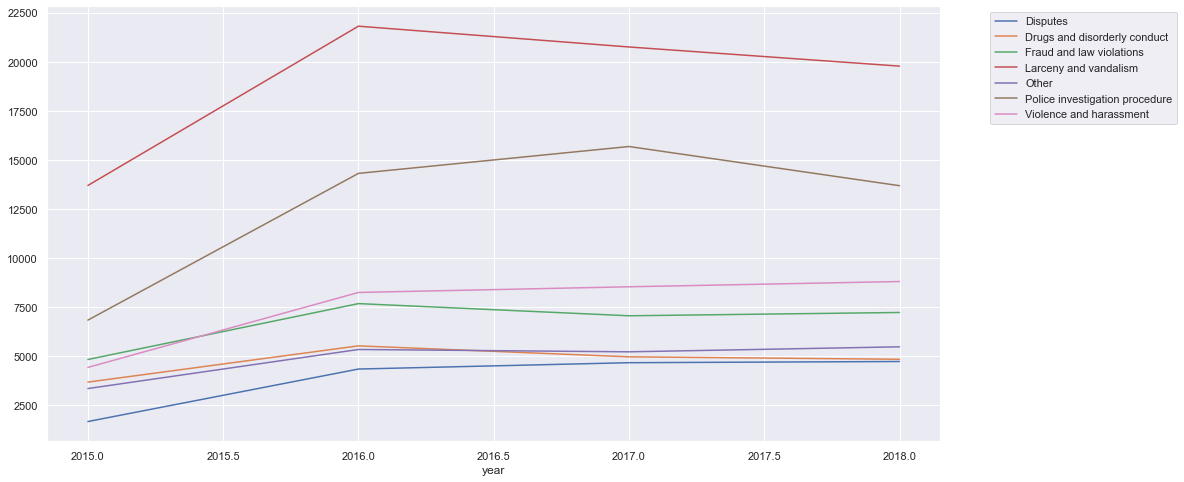

In [177]:
timing_df.groupby('year').sum()[['Disputes','Drugs and disorderly conduct',\
                             'Fraud and law violations','Larceny and vandalism',\
                             'Other','Police investigation procedure','Violence and harassment']].astype(int).plot()
plt.legend(bbox_to_anchor=(1.05, 1))
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches((16,8));

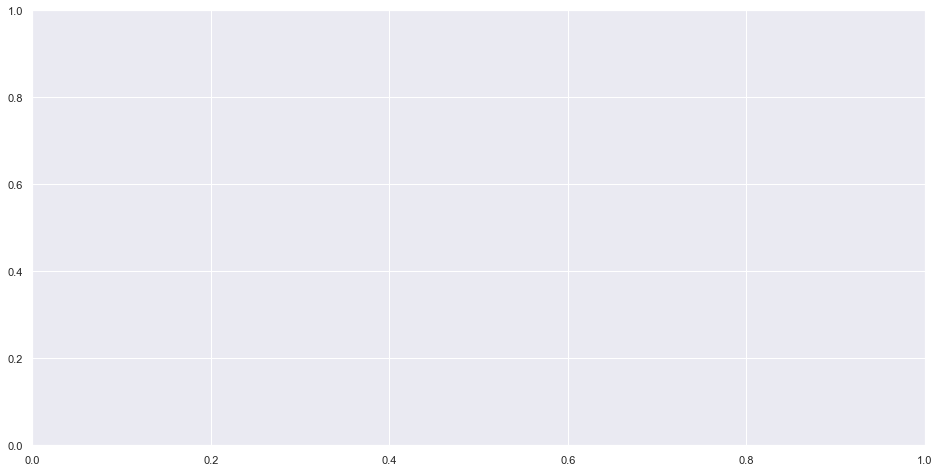

In [160]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    timing_df.groupby('OFFENSE_CODE_GROUP').count()

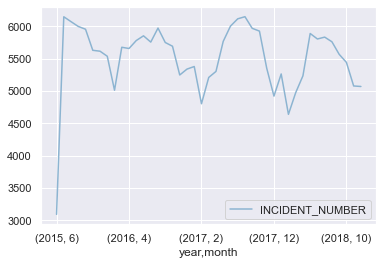

In [140]:
tmp = timing_df.groupby(['year', 'month']).count()[['INCIDENT_NUMBER']]#.reset_index()
with sns.color_palette("PuBuGn_d"):
    tmp.plot()

In [119]:
#timing_df.set_index('OCCURRED_ON_DATE', inplace=True)

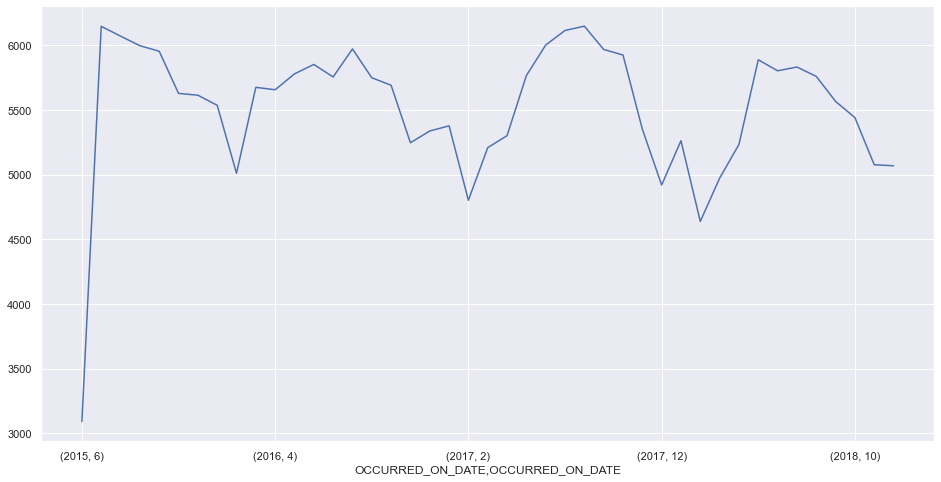

In [141]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    timing_df.groupby([(timing_df.index.year),(timing_df.index.month)]).count()['INCIDENT_NUMBER'].plot()

In [130]:
timing_df.resample('1M').sum()['SHOOTING']

OCCURRED_ON_DATE
2015-06-30    14
2015-07-31    51
2015-08-31    56
2015-09-30    22
2015-10-31    15
2015-11-30    29
2015-12-31    40
2016-01-31    17
2016-02-29    18
2016-03-31    12
2016-04-30    14
2016-05-31    24
2016-06-30    50
2016-07-31    38
2016-08-31    35
2016-09-30    22
2016-10-31    29
2016-11-30    30
2016-12-31    37
2017-01-31    26
2017-02-28    24
2017-03-31    17
2017-04-30    48
2017-05-31    26
2017-06-30    48
2017-07-31    41
2017-08-31    26
2017-09-30    36
2017-10-31    40
2017-11-30    21
2017-12-31    72
2018-01-31    28
2018-02-28    19
2018-03-31    11
2018-04-30    21
2018-05-31    35
2018-06-30    58
2018-07-31    42
2018-08-31    30
2018-09-30    36
2018-10-31    44
2018-11-30    30
2018-12-31    23
Freq: M, Name: SHOOTING, dtype: int64

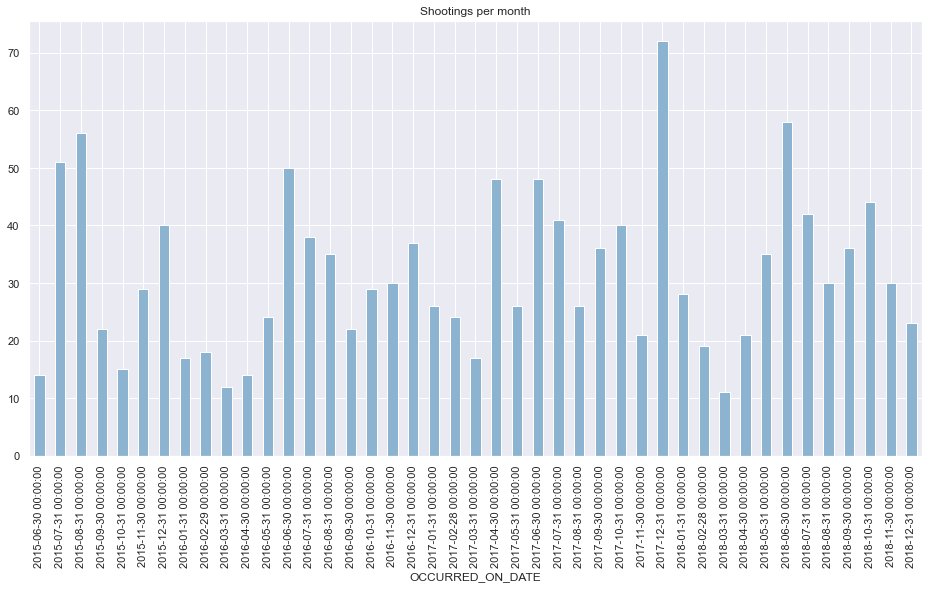

In [137]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    timing_df.resample('1M').sum()['SHOOTING'].plot(kind='bar')
    plt.title('Shootings per month')

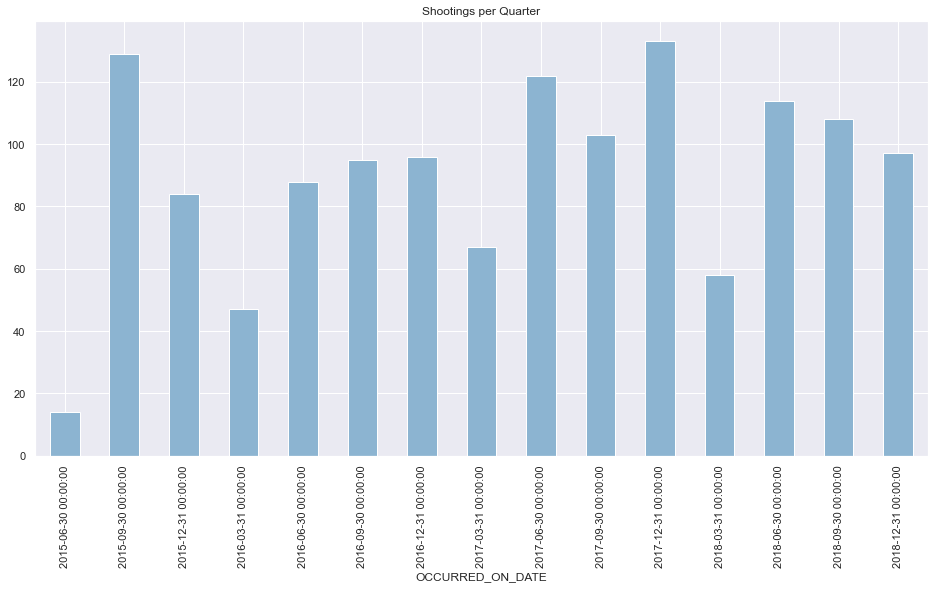

In [139]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    timing_df.resample('1Q').sum()['SHOOTING'].plot(kind='bar')
    plt.title('Shootings per Quarter')

In [142]:
timing_df.resample('1Y').sum()['SHOOTING']

OCCURRED_ON_DATE
2015-12-31    227
2016-12-31    326
2017-12-31    425
2018-12-31    377
Freq: A-DEC, Name: SHOOTING, dtype: int64

<AxesSubplot:xlabel='OCCURRED_ON_DATE'>

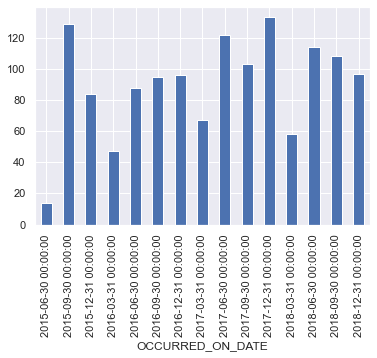

In [127]:
timing_df.resample('1Q').sum()['SHOOTING'].plot(kind='bar')

No handles with labels found to put in legend.


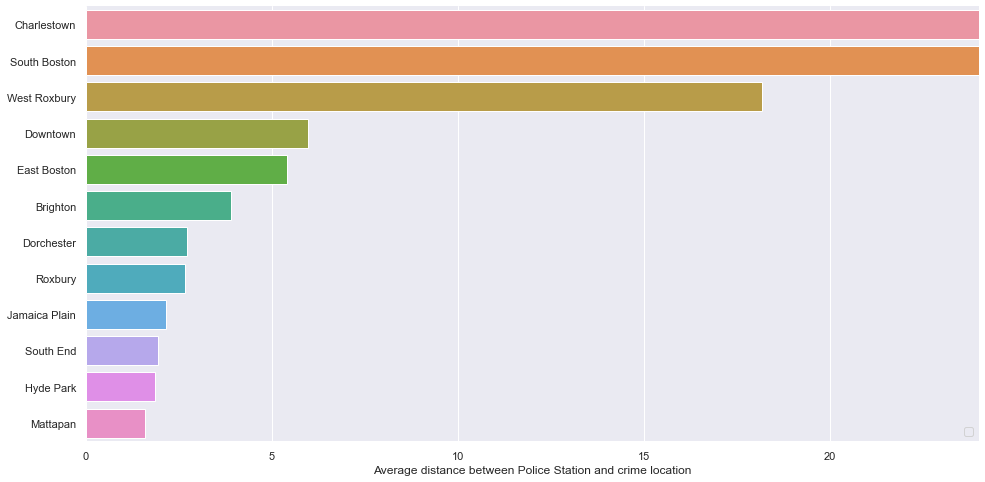

In [89]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    sns.barplot(y=distance_df.index, x=distance_df.AVG_DISTANCE, orient="h")
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 24), ylabel="",
       xlabel="Average distance between Police Station and crime location")
    sns.despine(left=True, bottom=True)

In [25]:
timing_df

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
OCCURRED_ON_DATE,,,,,,,,
2015-08-28 10:20:00,I192068249,Other,0,42.330119,-71.084251,Roxbury,42.328894,-71.085359
2015-09-14 09:31:00,I182074094,Violence and harassment,0,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2015-07-12 15:37:00,I182054888,Violence and harassment,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...
2018-08-09 18:00:00,I172049757,Police investigation procedure,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300
2018-08-09 18:00:00,I172049757,Drugs and disorderly conduct,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300
2018-12-12 05:00:00,I172027369,Other,0,42.376852,-71.068873,Charlestown,42.361800,-71.060300


### Distance

In [5]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [51]:
distance_df = data.copy()
distance_df['AVG_DISTANCE'] = distance_df[['LAT', 'LONG', 'LAT_POLICE_STATION', 'LONG_POLICE_STATION']].apply(lambda x: haversine_distance(*x), axis=1)
distance_df = distance_df.groupby(['NAME']).mean()[['AVG_DISTANCE']].sort_values(by='AVG_DISTANCE', ascending=False)
distance_df

,AVG_DISTANCE
NAME,
Charlestown,57.206177
South Boston,30.835665
West Roxbury,18.178571
Downtown,5.981918
East Boston,5.416621
Brighton,3.903264
Dorchester,2.730074
Roxbury,2.665766
Jamaica Plain,2.169588


In [52]:
data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300


No handles with labels found to put in legend.


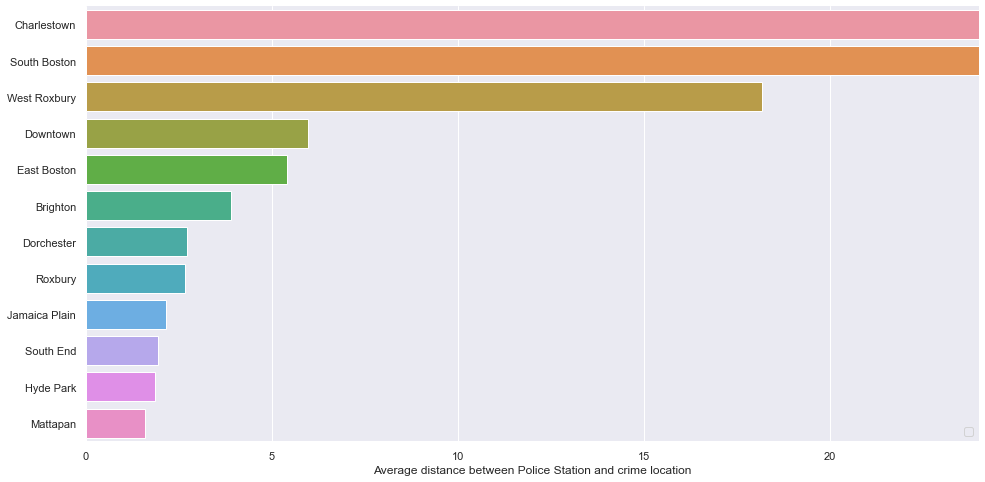

In [53]:
f, ax = plt.subplots(figsize=(16, 8))
with sns.color_palette("PuBuGn_d"):
    sns.barplot(y=distance_df.index, x=distance_df.AVG_DISTANCE, orient="h")
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 24), ylabel="",
       xlabel="Average distance between Police Station and crime location")
    sns.despine(left=True, bottom=True)